In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('MACHINE LEARNING/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

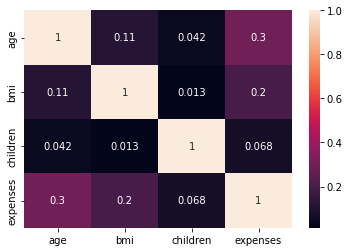

In [4]:
sns.heatmap(df.corr(),annot=True)

#### from the above observation we can say that all the features are uncorrelated.

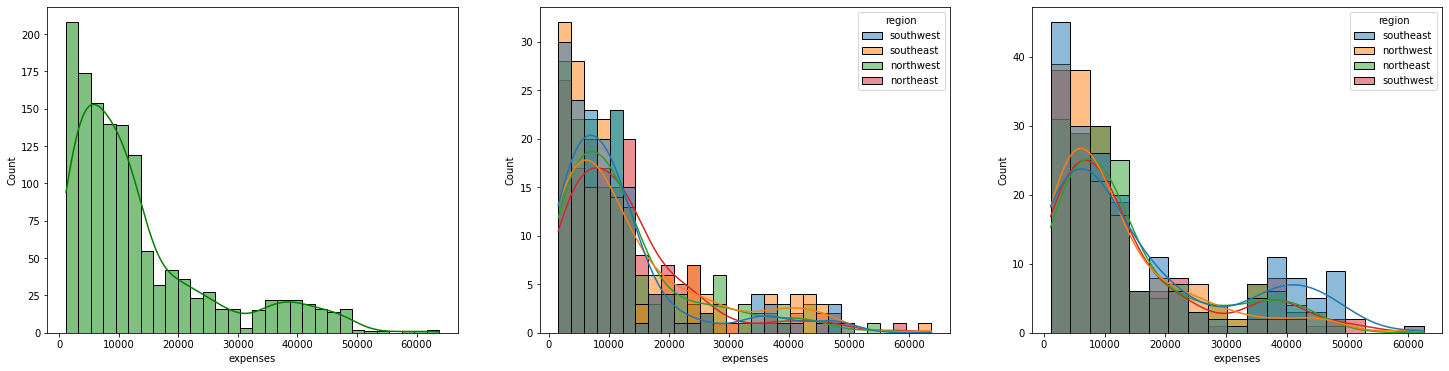

In [5]:
fig , axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='expenses',bins=30,kde='True',color='g')
plt.subplot(132)
sns.histplot(data=df[df.sex=='female'],x='expenses',kde='True',hue='region')
plt.subplot(133)
sns.histplot(data=df[df.sex=='male'],x='expenses',kde='True',hue='region')
plt.show()

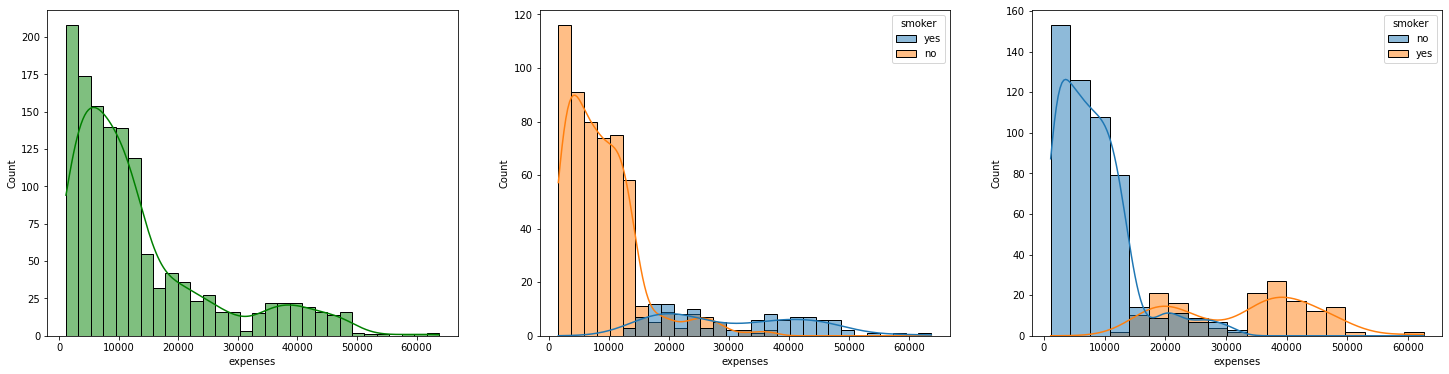

In [6]:
fig , axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='expenses',bins=30,kde='True',color='g')
plt.subplot(132)
sns.histplot(data=df[df.sex=='female'],x='expenses',kde='True',hue='smoker')
plt.subplot(133)
sns.histplot(data=df[df.sex=='male'],x='expenses',kde='True',hue='smoker')
plt.show()

#### people who smoke will have high expenses when compared to non smokers most of the people in the given data are non smokers when compared to females , males are more tends to smoke and will high expenses


# Multivariate analysis using pieplot

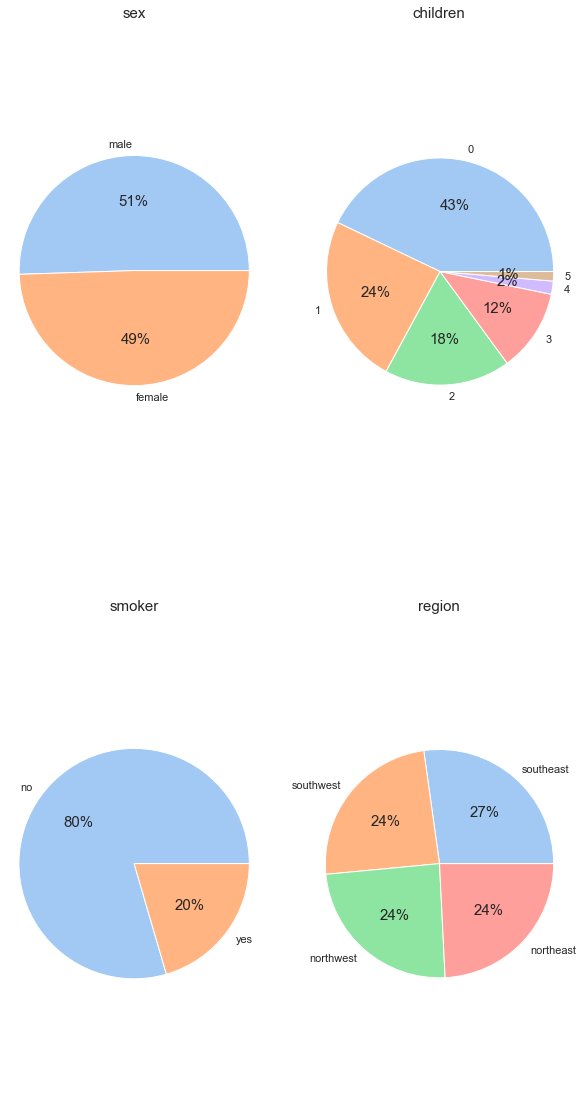

In [7]:
df1=df.copy()
df1.drop(["expenses","bmi","age"], axis=1, inplace=True)
#sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set(rc={
            "font.size":15,
            "axes.titlesize":15,
            "axes.labelsize":15},
             style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize = (10, 20))
for i, col in enumerate(df1):
    column_values = df1[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("pastel"),autopct = '%1.0f%%')
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Analysis on continuous features

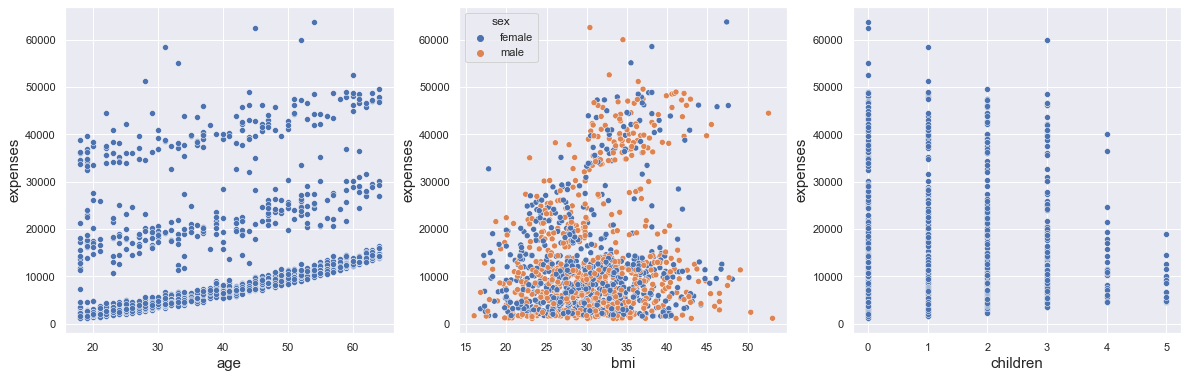

In [9]:
fig ,axes =plt.subplots(1,3, figsize=(20,6))
sns.scatterplot(data=df,x='age',y='expenses',ax=axes[0])
sns.scatterplot(data=df,x='bmi',y='expenses',ax=axes[1],hue='sex')
sns.scatterplot(data=df,x='children',y='expenses',ax=axes[2])
plt.show()

## Analysis on categorical features

### impact of gender on expenses

In [10]:
gender_group = df.groupby('sex').mean()
gender_group

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


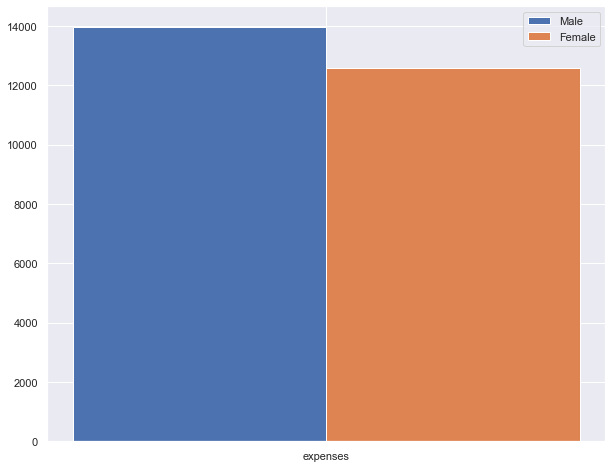

In [11]:
plt.figure(figsize=(10,8))
female_expenses = [gender_group['expenses'][0]]
male_expenses = [gender_group['expenses'][1]]
X = ['expenses']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_expenses, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_expenses, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.legend()
plt.show()

Male has more medical expenes when compared to female


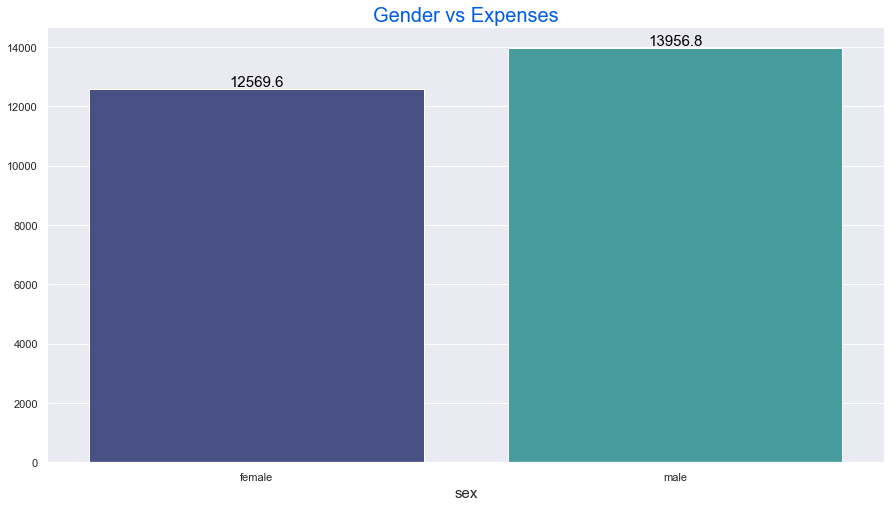

In [12]:
Group_data2=df.groupby('sex')
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=Group_data2['expenses'].mean().index,y=Group_data2['expenses'].mean().values,palette = 'mako')
ax.set_title('Gender vs Expenses',color='#005ce6',size=20)

for container in ax.containers:
   ax.bar_label(container,color='black',size=15)

## Impact of smoking on expenses

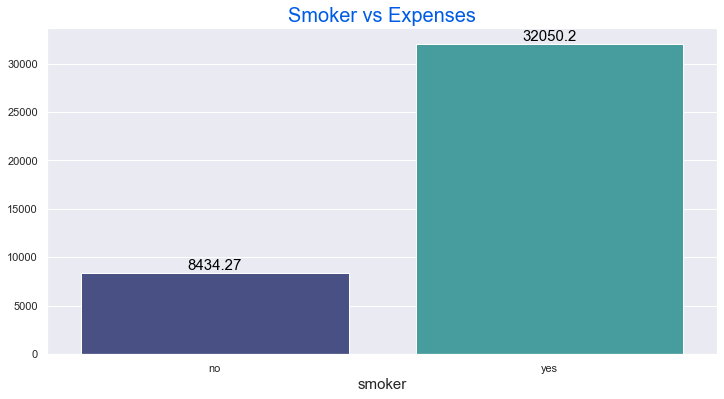

In [13]:
smoker_group=df.groupby('smoker')
f,ax=plt.subplots(1,1,figsize=(12,6))
sns.barplot(x=smoker_group['expenses'].mean().index,y=smoker_group['expenses'].mean().values,palette='mako')
ax.set_title('Smoker vs Expenses',color='#005ce6',size=20)

for container in ax.containers:
   ax.bar_label(container,color='black',size=15)


#### From the above graph it is very clear that the smoker persons have more medical expenses

### impact of region on Medical expenses

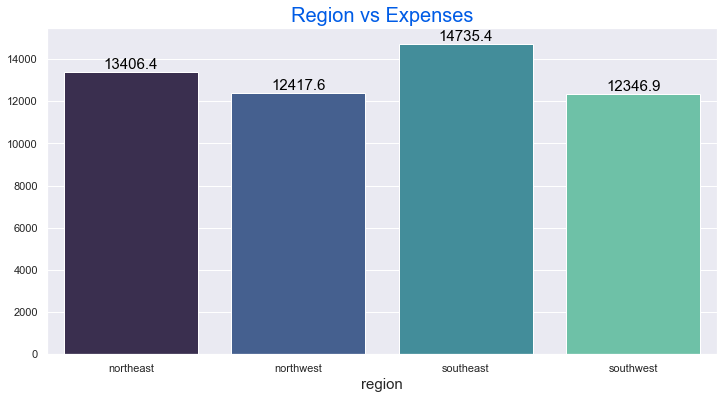

In [14]:
region_group=df.groupby('region')
f,ax=plt.subplots(1,1,figsize=(12,6))
sns.barplot(x=region_group['expenses'].mean().index,y=region_group['expenses'].mean().values,palette='mako')
ax.set_title('Region vs Expenses',color='#005ce6',size=20)

for container in ax.containers:
   ax.bar_label(container,color='black',size=15)

#### When compoared to all the regions people from south east will have slightly high medical expenses

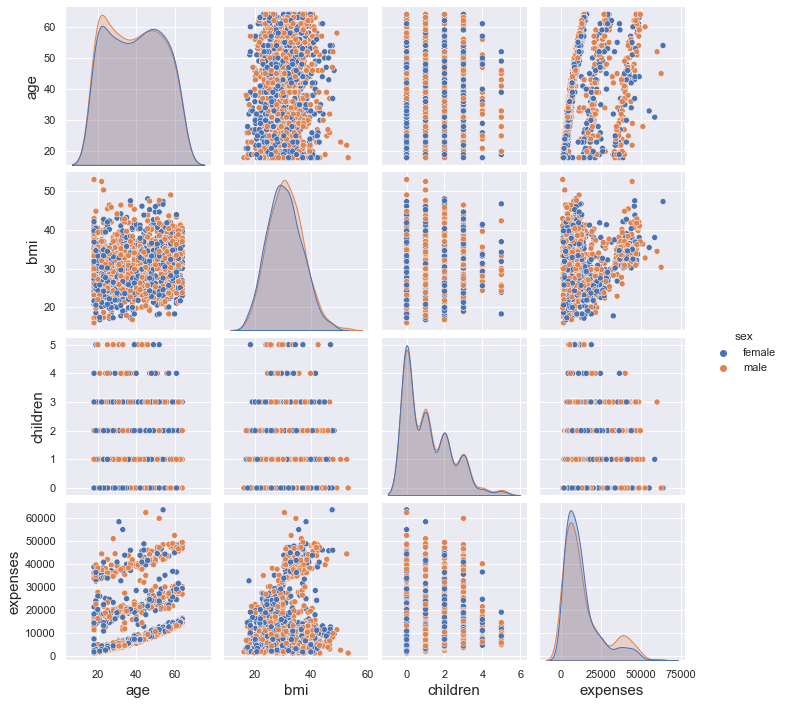

In [15]:
sns.pairplot(df,hue='sex')
plt.show()